<a href="https://colab.research.google.com/github/lblogan14/opencv3_with_python/blob/master/ch3_cartoonize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/OpenCV3_with_Python_by_Example/data/ch3/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/OpenCV3_with_Python_by_Example/data/ch3


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Cartoonize an image

In [0]:
def cartoonize_image(img, ksize=5, sketch_mode=False):
  num_repetitions, sigma_color, sigma_space, ds_factor = 10, 5, 7, 4
  # convert image to grayscale
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # apply median filter to the grayscale image
  img_gray = cv2.medianBlur(img_gray, 7)
  
  # detect edges in the image and threshold it
  edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=ksize)
  ret, mask = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV)
  
  # mask is the sketch of the image
  if sketch_mode:
    return cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
  
  # resize the image to a smaller size for faster computation
  img_small = cv2.resize(img, None, fx=1.0/ds_factor, fy=1.0/ds_factor, interpolation=cv2.INTER_AREA)
  
  # apply bilateral filter to the image multiple times
  for i in range(num_repetitions):
    img_small = cv2.bilateralFilter(img_small, ksize, sigma_color, sigma_space)
    
  img_output = cv2.resize(img_small, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_LINEAR)
  
  #dst = np.zeros(img_gray.shape)
  
  # add the thick boundary lines to the image using 'AND' operator
  #dst = cv2.bitwise_and(img_output, img_output, mask=mask)
  
  img_output = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
  return img_output

In [0]:
img = cv2.imread('lena.png')
output_1 = cartoonize_image(img, ksize=5, sketch_mode=True)
output_2 = cartoonize_image(img, ksize=5, sketch_mode=False)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 368.5, 368.5, -0.5)

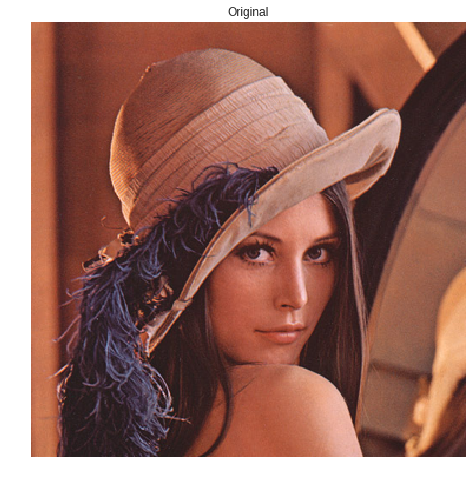

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

(-0.5, 368.5, 368.5, -0.5)

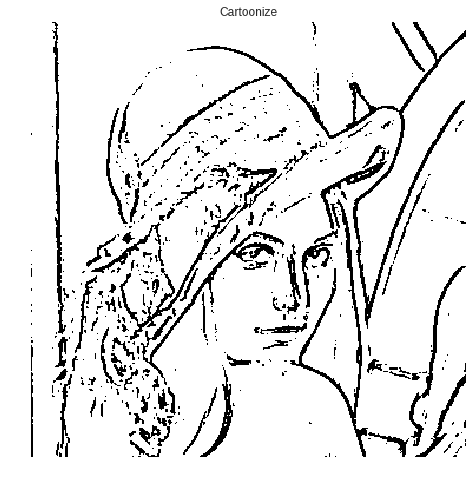

In [23]:
plt.figure(figsize=(10,8))
plt.imshow(output_1)
plt.title('Cartoonize')
plt.axis('off')

(-0.5, 367.5, 367.5, -0.5)

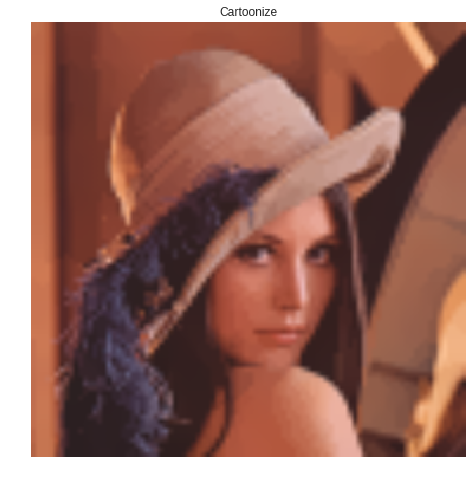

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(output_2, cmap='gray')
plt.title('Cartoonize')
plt.axis('off')

The **median filters** are good at removing salt and pepper noise.

In [0]:
img = cv2.imread('green_dots.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
output = cv2.medianBlur(img, ksize=7)

(-0.5, 504.5, 484.5, -0.5)

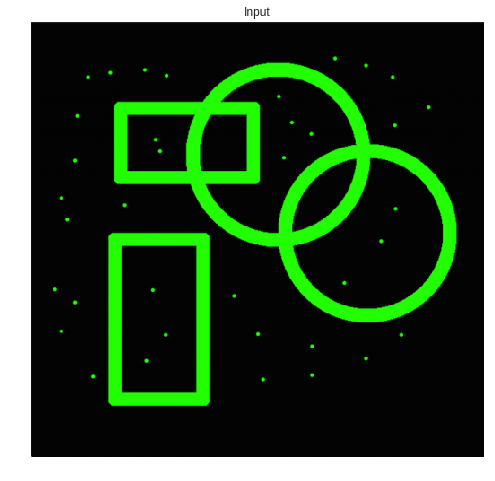

In [30]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.title('Input')
plt.axis('off')

(-0.5, 504.5, 484.5, -0.5)

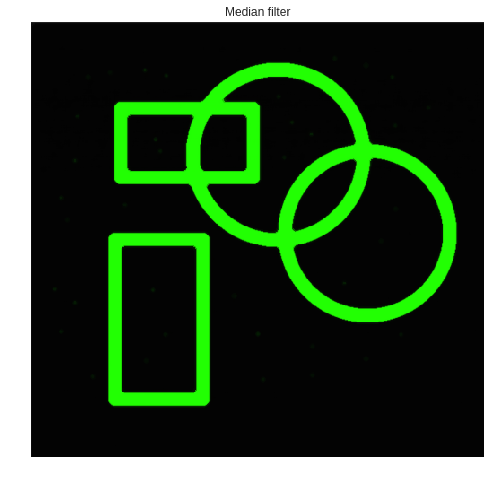

In [31]:
plt.figure(figsize=(10,8))
plt.imshow(output)
plt.title('Median filter')
plt.axis('off')

The second argument in this function specifies the size of
the kernel we are using. The size of the kernel is related to the neighborhood size that we
need to consider. The possible values are only odd numbers: 1, 3, 5, 7, and so on.

**Bilateral filter** is much better than a Gaussian filter. It preserves the edges whereas the Gaussian filter smoothens everything out equally.

In [0]:
img = cv2.imread('blue_carpet.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gaussian = cv2.GaussianBlur(img, (13,13), 0)
img_bilateral = cv2.bilateralFilter(img, 13, 70, 50)

(-0.5, 1020.5, 644.5, -0.5)

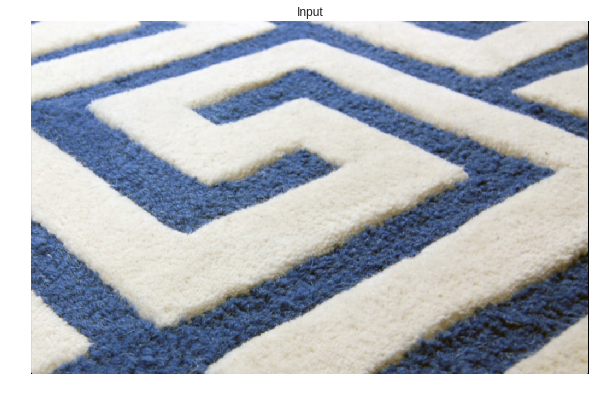

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.title('Input')
plt.axis('off')

(-0.5, 1020.5, 644.5, -0.5)

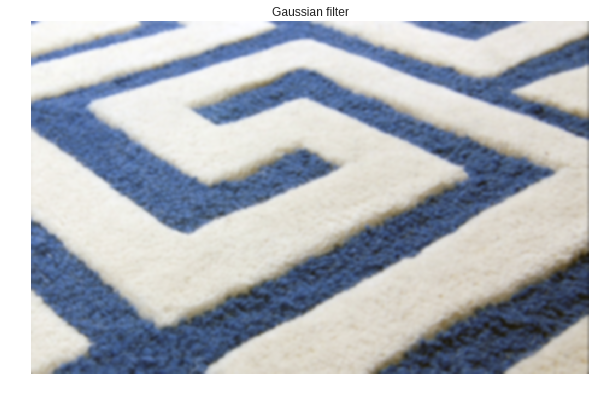

In [34]:
plt.figure(figsize=(10,8))
plt.imshow(img_gaussian)
plt.title('Gaussian filter')
plt.axis('off')

The edges in the Gaussian filtered image look blurred

(-0.5, 1020.5, 644.5, -0.5)

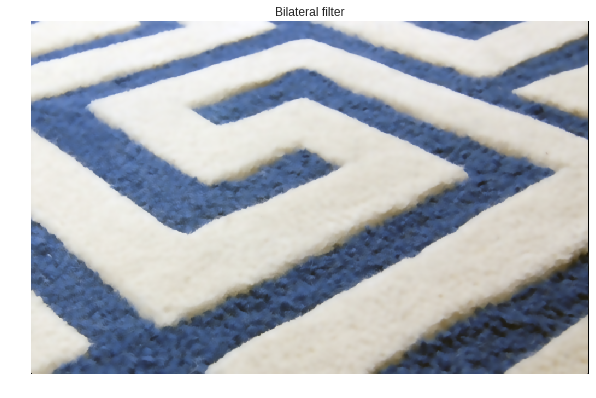

In [35]:
plt.figure(figsize=(10,8))
plt.imshow(img_bilateral)
plt.title('Bilateral filter')
plt.axis('off')

`cv2.bilateralFilter(img, size, sigma_color, sigma_space)`
* `sigma_color` specifies the color neighborhood
* `sigma_space` specifies the space neighborhood